In [1]:
import pandas as pd
import numpy as np
import sklearn as sl
import seaborn as sns

In [2]:
print(pd.__version__)

2.3.1


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [3]:
print(len(df))
print(df.shape)
print(df.describe)

9704
(9704, 11)
<bound method NDFrame.describe of       engine_displacement  num_cylinders  horsepower  vehicle_weight  \
0                     170            3.0       159.0     3413.433759   
1                     130            5.0        97.0     3149.664934   
2                     170            NaN        78.0     3079.038997   
3                     220            4.0         NaN     2542.392402   
4                     210            1.0       140.0     3460.870990   
...                   ...            ...         ...             ...   
9699                  140            5.0       164.0     2981.107371   
9700                  180            NaN       154.0     2439.525729   
9701                  220            2.0       138.0     2583.471318   
9702                  230            4.0       177.0     2905.527390   
9703                  270            3.0       140.0     2908.043477   

      acceleration  model_year  origin fuel_type         drivetrain  \
0             

In [15]:
for i in df:
    print([i])
    print(df[i].head().unique())
    print(df[i].nunique())

['engine_displacement']
[170 130 220 210]
36
['num_cylinders']
[ 3.  5. nan  4.  1.]
14
['horsepower']
[159.  97.  78.  nan 140.]
192
['vehicle_weight']
[3413.43375861 3149.66493422 3079.03899737 2542.39240183 3460.87098999]
9704
['acceleration']
[17.7 17.8 15.1 20.2 14.4]
162
['model_year']
[2003 2007 2018 2009]
24
['origin']
['Europe' 'USA']
3
['fuel_type']
['Gasoline' 'Diesel']
2
['drivetrain']
['All-wheel drive' 'Front-wheel drive']
2
['num_doors']
[0. 2.]
9
['fuel_efficiency_mpg']
[13.23172891 13.68821744 14.246341   16.9127356  12.48836912]
9704


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

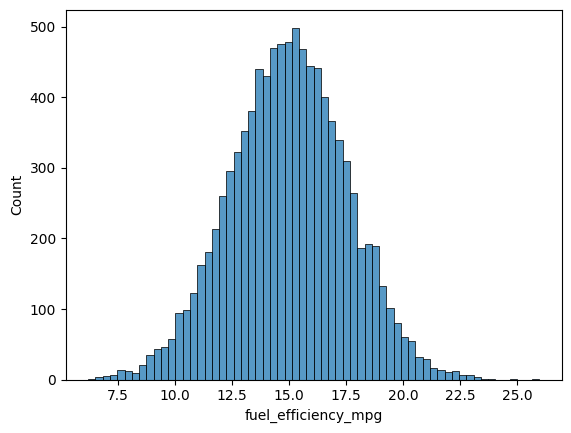

In [13]:
sns.histplot(df.fuel_efficiency_mpg)

In [16]:
#Q1
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [18]:
#Q2
print(df['horsepower'].median())

149.0


In [3]:
#Q3
v_train = round(len(df)*0.6)
v_valid = round(len(df)*0.2)
v_test = round(len(df)*0.2)
#int(len(df)*0.2)

In [4]:
n = len(df)
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
print(idx)

[ 483 7506 8795 ... 5390  860 7270]


In [7]:
#Q3
#df_train = df.iloc[idx[v_train : ]]
df_train = df.iloc[idx[ : v_train]]
df_valid = df.iloc[idx[v_train : v_train + v_valid]]
df_test = df.iloc[idx[v_train + v_valid : ]]
print(df_train)

      engine_displacement  num_cylinders  horsepower  vehicle_weight  \
483                   220            3.0       144.0     2535.887591   
7506                  160            2.0       141.0     2741.170484   
8795                  230            3.0       155.0     2471.880237   
1688                  150            3.0       206.0     3748.164469   
6217                  300            4.0       111.0     2135.716359   
...                   ...            ...         ...             ...   
8387                  160            2.0       111.0     3038.134712   
7331                  160            NaN       157.0     2877.624938   
1696                  260            5.0       139.0     2606.972984   
5685                  280            4.0       132.0     4004.214323   
6735                  210            3.0       152.0     2500.175687   

      acceleration  model_year  origin fuel_type         drivetrain  \
483           18.7        2009     USA  Gasoline    All-wheel dr

In [8]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.pinv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]

    return w0, w

In [9]:
#Q3
df_null_to_0 = df.select_dtypes(exclude='object').copy()
df_colnames = ['engine_displacement','horsepower','vehicle_weight','model_year']
X_train = df_train[df_colnames].fillna(0).values
y_train = df_train['fuel_efficiency_mpg'].values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

<Axes: ylabel='Count'>

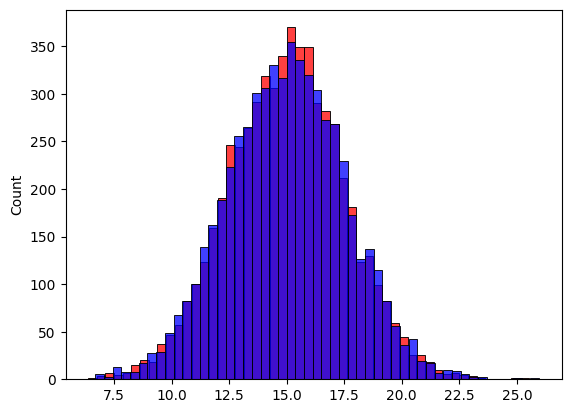

In [11]:
sns.histplot(y_pred,color = 'red')
sns.histplot(y_train, color = 'blue')

In [8]:
#Q3
df_train_2 = df_train.select_dtypes(exclude='object').copy()
#X_train_2 = df_train[df_colnames].fillna(df_train.mean()).values
for i in df_colnames:
    df_train_2[i] = df_train_2[i].fillna(df_train_2[i].mean())

X_train_2 = df_train_2[df_colnames].values
w0, w = train_linear_regression(X_train_2, y_train)
y_pred_2 = w0 + X_train_2.dot(w)

<Axes: ylabel='Count'>

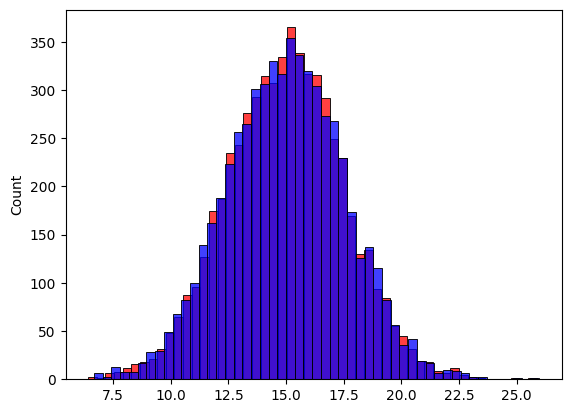

In [17]:
sns.histplot(y_pred_2,color = 'red')
sns.histplot(y_train, color = 'blue')

In [12]:
def rmse(y, y_pred):
    se = (y - y_pred) **2
    mse = se.mean()
    return round(np.sqrt(mse),2)

In [10]:
print(rmse(y_train, y_pred))
print(rmse(y_train, y_pred_2))

0.52
0.46


In [28]:
#Q4
def train_linear_regression_reg(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.pinv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]

    return w0, w

In [20]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    y_pred = w0 + X_train.dot(w)
    print(rmse(y_train, y_pred))
#print(rmse(y_train, y_pred))

0.52
0.52
0.52
0.53
0.53
0.53
0.53


In [24]:
#Q5
v = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(s)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[ : v_train]]
    df_valid = df.iloc[idx[v_train : v_train + v_valid]]
    df_test = df.iloc[idx[v_train + v_valid : ]]
    X_train = df_train[df_colnames].fillna(0).values
    y_train = df_train['fuel_efficiency_mpg'].values
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_train.dot(w)
    v.append(rmse(y_train, y_pred))
print(round(np.std(v), 3))

0.005


In [29]:
#Q6
np.random.seed(9)
np.random.shuffle(idx)
df_train_full = pd.concat([df_train,df_valid], axis=1)
df_test = df.iloc[idx[v_train + v_valid : ]]
X_train = df_train[df_colnames].fillna(0).values
y_train = df_train['fuel_efficiency_mpg'].values
train_linear_regression_reg(X_train, y_train, r = 0.001)
y_pred = w0 + X_train.dot(w)
rmse(y_train, y_pred)

np.float64(0.52)